In [3]:
import pandas as pd
import re


In [4]:
table=pd.read_csv("books_new.csv")


In [5]:
table.head()

,Title,Author,Genre,SubGenre,Height,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",tech,signal_processing,228,Wiley
1,Data Smart,"Foreman, John",tech,data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",tech,mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",science,economics,179,HarperCollins
4,Orientalism,"Said, Edward",nonfiction,history,197,Penguin


In [6]:
table.columns

Index(['Title', 'Author', 'Genre', 'SubGenre', 'Height', 'Publisher'], dtype='object')

In [7]:
table.shape

(211, 6)

In [8]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      211 non-null    object
 1   Author     187 non-null    object
 2   Genre      211 non-null    object
 3   SubGenre   211 non-null    object
 4   Height     211 non-null    int64 
 5   Publisher  115 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.0+ KB


In [9]:
def imp_features(table):
    data=table.copy()
    for i in range(0,table.shape[0]):
        data["imp"]=data["Title"]+" "+data["Author"]+" "+data["Genre"]+" "+data["SubGenre"]
    return data

In [10]:
data = imp_features(table)

In [16]:
data.head()

,Title,Author,Genre,SubGenre,Height,Publisher,imp
0,Fundamentals of Wavelets,"Goswami, Jaideva",tech,signal_processing,228,Wiley,"Fundamentals of Wavelets Goswami, Jaideva tech..."
1,Data Smart,"Foreman, John",tech,data_science,235,Wiley,"Data Smart Foreman, John tech data_science"
2,God Created the Integers,"Hawking, Stephen",tech,mathematics,197,Penguin,"God Created the Integers Hawking, Stephen tech..."
3,Superfreakonomics,"Dubner, Stephen",science,economics,179,HarperCollins,"Superfreakonomics Dubner, Stephen science econ..."
4,Orientalism,"Said, Edward",nonfiction,history,197,Penguin,"Orientalism Said, Edward nonfiction history"


In [11]:
data["ids"]=[i for i in range(0,data.shape[0])]

In [11]:
data.head()

,Title,Author,Genre,SubGenre,Height,Publisher,imp,ids
0,Fundamentals of Wavelets,"Goswami, Jaideva",tech,signal_processing,228,Wiley,"Fundamentals of Wavelets Goswami, Jaideva tech...",0
1,Data Smart,"Foreman, John",tech,data_science,235,Wiley,"Data Smart Foreman, John tech data_science",1
2,God Created the Integers,"Hawking, Stephen",tech,mathematics,197,Penguin,"God Created the Integers Hawking, Stephen tech...",2
3,Superfreakonomics,"Dubner, Stephen",science,economics,179,HarperCollins,"Superfreakonomics Dubner, Stephen science econ...",3
4,Orientalism,"Said, Edward",nonfiction,history,197,Penguin,"Orientalism Said, Edward nonfiction history",4


In [12]:
data.Title

0          Fundamentals of Wavelets
1                        Data Smart
2          God Created the Integers
3                 Superfreakonomics
4                       Orientalism
                   ...             
206        Structure and Randomness
207    Image Processing with MATLAB
208                     Animal Farm
209                      Idiot, The
210              Christmas Carol, A
Name: Title, Length: 211, dtype: object

In [96]:
n=""
for i in data['SubGenre'].values:
    
    n=n+i+" "

s=""
for i in data['Genre'].values:
    
    s=s+i+" "
a=""
for i in data['Title'].values:
    
    a=a+i+" "
h=a+n+s
print(h)



Fundamentals of Wavelets Data Smart God Created the Integers Superfreakonomics Orientalism Nature of Statistical Learning Theory, The Integration of the Indian States Drunkard's Walk, The Image Processing & Mathematical Morphology How to Think Like Sherlock Holmes Data Scientists at Work Slaughterhouse Five Birth of a Theorem Structure & Interpretation of Computer Programs Age of Wrath, The Trial, The Statistical Decision Theory' Data Mining Handbook New Machiavelli, The Physics & Philosophy Making Software Analysis, Vol I Machine Learning for Hackers Signal and the Noise, The Python for Data Analysis Introduction to Algorithms Beautiful and the Damned, The Outsider, The Complete Sherlock Holmes, The - Vol I Complete Sherlock Holmes, The - Vol II Wealth of Nations, The Pillars of the Earth, The Mein Kampf Tao of Physics, The Surely You're Joking Mr Feynman Farewell to Arms, A Veteran, The False Impressions Last Lecture, The Return of the Primitive Jurassic Park Russian Journal, A Tales

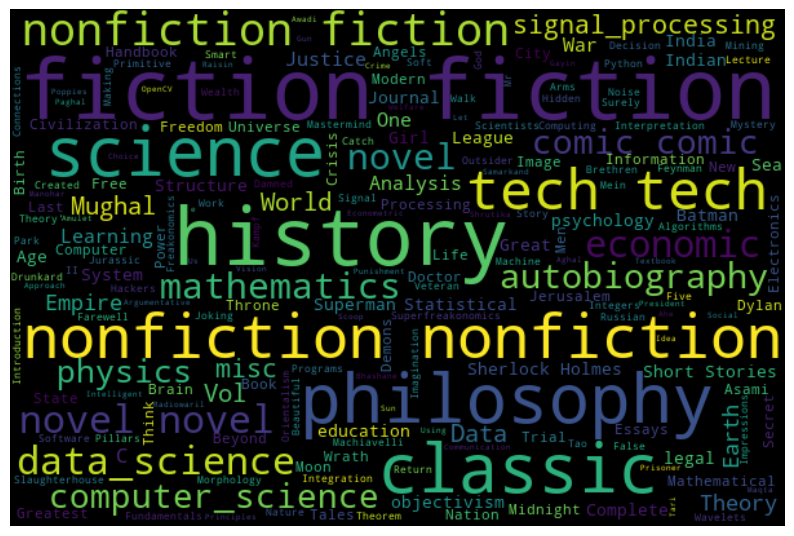

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(h)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

coverting data into vectors

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vec=TfidfVectorizer()

In [13]:
vecs=vec.fit_transform(data["imp"].apply(lambda x: np.str_(x)))

In [15]:
vecs.shape

(211, 594)

In [34]:
vecs


<211x594 sparse matrix of type '<class 'numpy.float64'>'
	with 1349 stored elements in Compressed Sparse Row format>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
table.describe()


,Height
count,211.000000
mean,206.056872
std,26.828141
min,160.000000
25%,180.000000
50%,199.000000
75%,229.500000
max,283.000000


In [41]:
table.tail()

,Title,Author,Genre,SubGenre,Height,Publisher
206,Structure and Randomness,"Tao, Terence",science,mathematics,252,NaN
207,Image Processing with MATLAB,"Eddins, Steve",tech,signal_processing,241,NaN
208,Animal Farm,"Orwell, George",fiction,classic,180,NaN
209,"Idiot, The","Dostoevsky, Fyodor",fiction,classic,197,NaN
210,"Christmas Carol, A","Dickens, Charles",fiction,classic,196,NaN


In [42]:
table.head()

,Title,Author,Genre,SubGenre,Height,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",tech,signal_processing,228,Wiley
1,Data Smart,"Foreman, John",tech,data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",tech,mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",science,economics,179,HarperCollins
4,Orientalism,"Said, Edward",nonfiction,history,197,Penguin


In [46]:
table.Genre

0            tech
1            tech
2            tech
3         science
4      nonfiction
          ...    
206       science
207          tech
208       fiction
209       fiction
210       fiction
Name: Genre, Length: 211, dtype: object

In [16]:
from scipy.sparse import csr_matrix
from  sklearn.neighbors import NearestNeighbors

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
sim=cosine_similarity(vecs)

In [18]:
sim.shape

(211, 211)

In [23]:
sim

array([[1.        , 0.05448002, 0.04526347, ..., 0.        , 0.        ,
        0.        ],
       [0.05448002, 1.        , 0.05243775, ..., 0.        , 0.        ,
        0.        ],
       [0.04526347, 0.05243775, 1.        , ..., 0.        , 0.03025218,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12455879,
        0.10735236],
       [0.        , 0.        , 0.03025218, ..., 0.12455879, 1.        ,
        0.12064514],
       [0.        , 0.        , 0.        , ..., 0.10735236, 0.12064514,
        1.        ]])

In [19]:
sim[2][2]

1.0000000000000002

In [21]:
model_knn = NearestNeighbors(metric= 'cosine', algorithm= 'brute')
model_knn.fit(sim)

NearestNeighbors(algorithm='brute', metric='cosine')

In [39]:
matrix = csr_matrix(sim)

In [31]:
user_query_index = np.random.choice(sim.shape[1])
user_query_index

155

In [100]:
data.index[user_query_index]

155

In [99]:
data.iloc[user_query_index, :]

Title                               Power Electronics - Rashid
Author                                        Rashid, Muhammad
Genre                                                     tech
SubGenre                                      computer_science
Height                                                     235
Publisher                                                  NaN
imp          Power Electronics - Rashid Rashid, Muhammad te...
ids                                                        155
Name: 155, dtype: object

In [37]:
def recommend(title):
    book_id=data[data.Title==title]["ids"].values[0]
    score=list(enumerate(sim[book_id]))
    sorted_score=sorted(score,key=lambda x:x[1],reverse=True)
    sorted_score=sorted_score[1:]
    bookt=[data[bookt[0]==data["ids"]]["Title"].values[0] for bookt in sorted_score]
    bookg=[data[bookg[0]==data["ids"]]["Genre"].values[0] for bookg in sorted_score]
    books=[bookt[x]+"--" + bookg[x] for x in range(len(bookt))]
    return books
    

In [21]:
def rec_five(books_list):
    first_five=[]
    c=0
    for b in books_list:
        if c>4:
            break
        c+=1
        first_five.append(b)
    return first_five


In [22]:
lst=recommend("Fundamentals of Wavelets")
rec_five(lst)

['Elements of Information Theory--tech',
 'Principles of Communication Systems--tech',
 'Learning OpenCV--tech',
 'Computer Vision, A Modern Approach--tech',
 'Image Processing with MATLAB--tech']

In [23]:
import pickle

In [24]:
pickle.dump(data.to_dict(),open('books_dict.pkl','wb'))

In [26]:
data["Title"].values

array(['Fundamentals of Wavelets', 'Data Smart',
       'God Created the Integers', 'Superfreakonomics', 'Orientalism',
       'Nature of Statistical Learning Theory, The',
       'Integration of the Indian States', "Drunkard's Walk, The",
       'Image Processing & Mathematical Morphology',
       'How to Think Like Sherlock Holmes', 'Data Scientists at Work',
       'Slaughterhouse Five', 'Birth of a Theorem',
       'Structure & Interpretation of Computer Programs',
       'Age of Wrath, The', 'Trial, The', "Statistical Decision Theory'",
       'Data Mining Handbook', 'New Machiavelli, The',
       'Physics & Philosophy', 'Making Software', 'Analysis, Vol I',
       'Machine Learning for Hackers', 'Signal and the Noise, The',
       'Python for Data Analysis', 'Introduction to Algorithms',
       'Beautiful and the Damned, The', 'Outsider, The',
       'Complete Sherlock Holmes, The - Vol I',
       'Complete Sherlock Holmes, The - Vol II', 'Wealth of Nations, The',
       'Pillars

In [27]:
data.to_dict()

{'Title': {0: 'Fundamentals of Wavelets',
  1: 'Data Smart',
  2: 'God Created the Integers',
  3: 'Superfreakonomics',
  4: 'Orientalism',
  5: 'Nature of Statistical Learning Theory, The',
  6: 'Integration of the Indian States',
  7: "Drunkard's Walk, The",
  8: 'Image Processing & Mathematical Morphology',
  9: 'How to Think Like Sherlock Holmes',
  10: 'Data Scientists at Work',
  11: 'Slaughterhouse Five',
  12: 'Birth of a Theorem',
  13: 'Structure & Interpretation of Computer Programs',
  14: 'Age of Wrath, The',
  15: 'Trial, The',
  16: "Statistical Decision Theory'",
  17: 'Data Mining Handbook',
  18: 'New Machiavelli, The',
  19: 'Physics & Philosophy',
  20: 'Making Software',
  21: 'Analysis, Vol I',
  22: 'Machine Learning for Hackers',
  23: 'Signal and the Noise, The',
  24: 'Python for Data Analysis',
  25: 'Introduction to Algorithms',
  26: 'Beautiful and the Damned, The',
  27: 'Outsider, The',
  28: 'Complete Sherlock Holmes, The - Vol I',
  29: 'Complete Sherlo

In [28]:
pickle.dump(sim,open('sim.pkl','wb'))